In [2]:
pip install mealpy==2.5.4

  Using cached mealpy-2.5.4-py3-none-any.whl (377 kB)
                                              0.0/16.6 MB ? eta -:--:--
                                              0.0/16.6 MB 1.3 MB/s eta 0:00:13
                                              0.1/16.6 MB 1.3 MB/s eta 0:00:13
                                              0.2/16.6 MB 1.5 MB/s eta 0:00:12
                                              0.3/16.6 MB 1.7 MB/s eta 0:00:10
                                              0.4/16.6 MB 1.8 MB/s eta 0:00:10
     -                                        0.6/16.6 MB 2.2 MB/s eta 0:00:08
     -                                        0.7/16.6 MB 2.4 MB/s eta 0:00:07
     --                                       0.8/16.6 MB 2.3 MB/s eta 0:00:07
     --                                       0.9/16.6 MB 2.4 MB/s eta 0:00:07
     --                                       0.9/16.6 MB 2.4 MB/s eta 0:00:07
     --                                       1.0/16.6 MB 2.0 MB/s eta 0:00:08
     


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import mealpy
print(mealpy.__version__)

2.5.4


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
import mealpy

ModuleNotFoundError: No module named 'tensorflow'

In [5]:

estimator = LinearRegression()
rfecv = RFECV(estimator, cv = 8)
data_training = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\datasets\\archive\\train.csv")
act = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]
data_training["Activity"].replace(act, list(range(1,7)), inplace= True)

y = data_training["Activity"]
data_training = data_training.drop("Activity", axis=1)
columns = data_training.columns
data_training = pd.DataFrame(data_training, columns= columns)

from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
data_ = scaler.fit_transform(data_training)
data_ = pd.DataFrame(data_, columns= data_training.columns)
data_training = data_


NameError: name 'LinearRegression' is not defined

In [6]:
data_training

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568,-1.828851
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,-0.897357,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875,-1.828851
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,-0.260878,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502,-1.828851
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,0.591045,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714,-1.828851
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.138515,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225,-1.828851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.358361,-0.967904,-1.273005,0.913859,1.095963,1.628612,0.821169,1.174137,1.609686,1.247727,...,-0.876738,-0.829197,-0.591277,1.846034,0.325923,-0.878008,-0.590763,0.605162,0.380984,1.402515
7348,-0.009044,0.243731,-0.676787,0.824887,1.026150,1.586100,0.726245,1.023755,1.658407,1.076279,...,-0.260847,-0.180290,0.166951,1.948561,-1.459501,0.849894,-0.551598,0.652468,0.381820,1.402515
7349,-0.015668,0.016781,1.132221,0.862975,0.810002,2.100249,0.768781,0.880813,2.266963,0.941403,...,1.034784,1.044548,0.131018,-0.599877,1.406760,1.479571,-0.565848,0.640597,0.348709,1.402515
7350,0.215866,-0.028123,-0.867710,0.860922,0.794902,2.086778,0.754697,0.944019,2.235301,1.047375,...,1.155541,0.913569,-0.326769,1.558312,1.525574,-1.220854,-0.577668,0.631478,0.293276,1.402515


In [19]:
#feature selection using principle component analysis

from sklearn.decomposition import PCA

def net_var(data):
    pca = PCA()
    pca.fit(data)

    #plot the explained variance ratio

    plt.plot( np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explianed Variance')
    plt.title('Cummulative Explained Variance graph')
    plt.show()

def scree_plot(data, k=None):
  pca = PCA()
  pca.fit(data)
  plt.figure(figsize=(10,5))
  plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_*100)
  plt.xlabel("principal components")
  plt.ylabel('variance explained')
  plt.title('Scree plot')

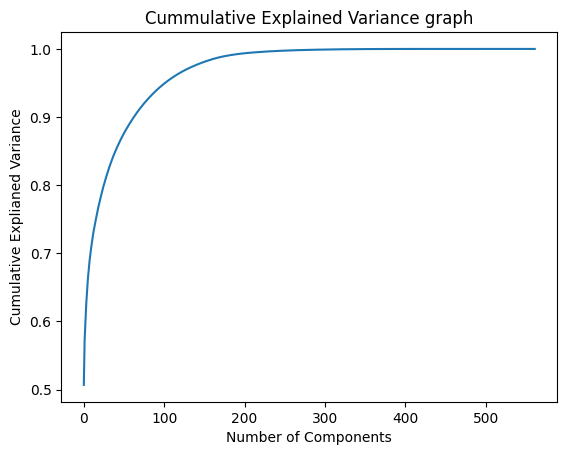

'This curve quantifies how much of the total, 562-dimensional variance is contained within the first N\n components. from the graph we can see that approximately 200 principal components are capable of accounting for 99% of the total varaince'

In [20]:

net_var(data_training)

"""This curve quantifies how much of the total, 562-dimensional variance is contained within the first N
 components. from the graph we can see that approximately 200 principal components are capable of accounting for 99% of the total varaince"""

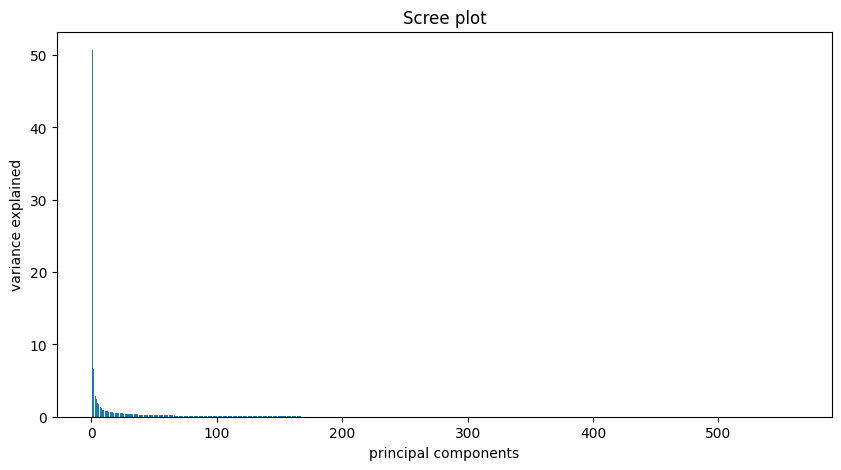

In [21]:
scree_plot(data_training)




In [22]:
#from the scree plot we can see that about 180 features contribute to the cummulative explained variance, let's verify

U, Sigma, Vt = np.linalg.svd(data_training.cov())
sum_first_k = np.sum(Sigma[:180])
sum_all = np.sum(Sigma)

retained_variance = sum_first_k/sum_all
print(retained_variance)

0.9902262765991686


In [23]:
pca = PCA(n_components = 180)
data_pca = pca.fit_transform(data_training)
data_pca = pd.DataFrame(data_pca)
data_pca.columns = [f'PC{i}' for i in range(1,181)]
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180
0,-16.127876,2.165066,-3.112131,0.272678,-6.793172,-4.126212,2.987745,-5.057888,0.715449,3.640292,...,-0.418063,0.500340,0.361860,0.035556,-0.181043,-0.233731,0.997471,0.224404,-0.144400,-0.515497
1,-15.285529,1.400438,0.714409,-2.813515,-4.259211,-1.963174,0.043776,-2.009881,-0.565461,0.184347,...,0.082069,-0.501095,-0.320465,-0.417385,-0.491780,-0.033383,0.087548,0.120238,0.131912,0.295509
2,-15.126334,2.486807,1.789351,-3.717822,-4.173597,-1.267454,0.102934,-1.555753,-0.633620,0.677366,...,-0.047021,0.019184,0.297389,-0.267037,-0.139479,-0.022416,0.073155,-0.003438,0.106312,-0.086157
3,-15.340192,3.929089,1.823029,-2.567368,-3.197204,-0.854802,0.561289,-1.991418,-1.155317,1.495072,...,-0.023639,-0.320467,0.455102,-0.790018,-0.334350,-0.014308,0.245603,0.546425,-0.070472,-0.151103
4,-15.534146,4.611814,2.218282,-2.897450,-3.073507,-0.989951,-1.026249,-0.947489,-0.641201,-1.119084,...,-0.223927,0.120884,0.287013,-0.242076,-0.049234,-0.295868,0.039905,0.048876,0.301673,-0.049456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,15.456717,-12.546903,-2.026290,-3.457852,1.510678,-2.762406,-3.579238,2.447927,-0.387205,-1.311320,...,-0.111030,0.178171,-0.375897,-0.233865,-0.497945,-0.107583,-0.382616,0.001774,-0.044880,-0.019096
7348,14.214403,-10.264201,-2.405790,-2.802797,1.310661,-4.399022,-2.201077,0.093568,0.586919,-0.703852,...,0.383326,0.040346,-0.104494,-0.016877,-0.095679,-0.451956,-0.473570,-0.069387,-0.166784,-0.291963
7349,14.325088,-12.271555,-4.053320,-3.849882,2.847266,-3.680110,-3.935536,-0.794058,0.822107,1.571190,...,0.182895,0.180918,-0.140195,0.196776,-0.023027,-0.254098,-0.361015,0.067824,-0.247820,0.130030
7350,12.867698,-14.081814,-2.942104,-5.013533,3.926981,-2.203410,-5.403362,0.392192,0.951791,1.648782,...,0.619460,0.327112,-0.180730,0.232973,0.094330,0.086448,-0.383553,0.261399,-0.480335,0.067685


In [24]:
#file_path_pca = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\data_pca.csv"
#data_pca.to_csv(file_path_pca)


In [25]:
#performing recursive feature elimination with cross validation to compare results with pca

data_rfecv = rfecv.fit_transform(data_training,y)

In [26]:
print(f'number of selected features: {rfecv.n_features_}')  #the number of features the algorithm deems fit based on rfecv

data_rfecv =  pd.DataFrame(data_rfecv, columns = data_training.columns[rfecv.support_==True].tolist() )
display(data_rfecv)

print(type(data_rfecv))


number of selected features: 504


,tBodyAcc-mean()-X,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.200642,-0.868814,-0.939441,-0.737529,-0.859817,-0.766437,-0.856036,-0.925985,-0.637379,0.906009,...,-0.929977,-0.795359,0.025960,-0.276399,0.062940,-0.778427,-0.687219,0.407946,-0.007568,-1.828851
1,0.055948,-0.875426,-0.923902,-0.849304,-0.868531,-0.848928,-0.871359,-0.892228,-0.889197,0.895998,...,-1.133978,0.130614,-0.897357,-0.767990,-0.021461,-1.218805,-0.694138,0.409117,0.007875,-1.828851
2,0.073515,-0.869039,-0.907760,-0.893785,-0.863137,-0.896701,-0.863323,-0.892228,-0.889197,0.880323,...,-1.133978,1.152336,-0.260878,-0.438316,0.391976,0.151207,-0.702239,0.410288,0.026502,-1.828851
3,0.066696,-0.870626,-0.940022,-0.921805,-0.864503,-0.925279,-0.863323,-0.957097,-0.927662,0.880323,...,-1.063749,1.112769,0.591045,0.463155,-0.033637,1.037851,-0.701684,0.414650,0.031714,-1.828851
4,0.030469,-0.875188,-0.934878,-0.921343,-0.867384,-0.928028,-0.870260,-0.932347,-0.910626,0.895413,...,-1.133978,-0.149577,-0.138515,-0.240313,0.268486,1.125918,-0.700152,0.425463,0.045225,-1.828851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.358361,0.913859,1.095963,1.628612,0.821169,1.609686,1.247727,1.188461,1.634933,-0.687823,...,0.943901,-0.778758,-0.876738,-0.829197,1.846034,0.325923,-0.590763,0.605162,0.380984,1.402515
7348,-0.009044,0.824887,1.026150,1.586100,0.726245,1.658407,1.076279,1.188461,1.787170,-0.663908,...,0.780778,0.159241,-0.260847,-0.180290,1.948561,-1.459501,-0.551598,0.652468,0.381820,1.402515
7349,-0.015668,0.862975,0.810002,2.100249,0.768781,2.266963,0.941403,0.693203,2.084524,-0.716166,...,0.703115,0.277877,1.034784,1.044548,-0.599877,1.406760,-0.565848,0.640597,0.348709,1.402515
7350,0.215866,0.860922,0.794902,2.086778,0.754697,2.235301,1.047375,0.554694,2.084524,-0.794074,...,0.784170,-0.443978,1.155541,0.913569,1.558312,1.525574,-0.577668,0.631478,0.293276,1.402515


<class 'pandas.core.frame.DataFrame'>


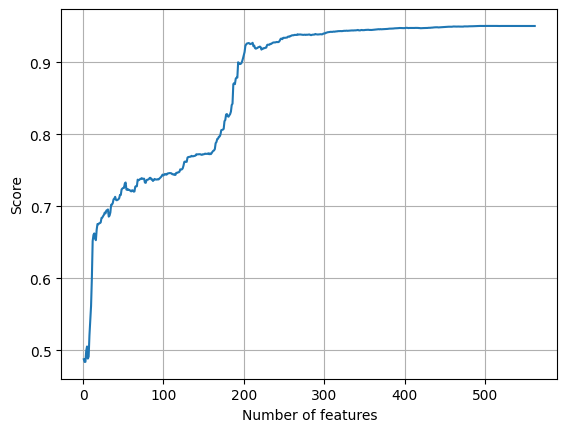

In [27]:




scores = rfecv.cv_results_['mean_test_score']

# Plotting the scores
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("Score")
plt.plot(range(1, len(scores) + 1), scores)
plt.grid(True)
plt.show()




In [28]:
print(type(data_rfecv))

<class 'pandas.core.frame.DataFrame'>


In [29]:
from sklearn.model_selection import train_test_split

dataTrain, dataTest, yTrain, yTest = train_test_split(data_training, y, test_size=0.20, random_state=42)
dataTrain_pca, dataTest_pca,_,_ = train_test_split(data_pca, y, test_size=0.20, random_state=42)
dataTrain_rfecv, dataTest_rfecv, _,_ = train_test_split(data_rfecv, y, test_size=0.20, random_state=42)



In [30]:
fp_data_rfecv = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\rfecv stuff\\data_rfecv.csv"
fp_dataTest_rfecv = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\rfecv stuff\\dataTest_rfecv.csv"
fp_dataTrain_rfecv = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\rfecv stuff\\dataTrain_rfecv.csv"

fp_data_training = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\og data\\data_training.csv"
fp_dataTest = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\og data\\dataTest.csv"
fp_dataTrain = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\og data\\dataTrain.csv"

fp_data_pca = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\pca datasets\\data_pca.csv"
fp_dataTest_pca = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\pca datasets\\dataTest_pca.csv"
fp_dataTrain_pca = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\pca datasets\\dataTrain_pca.csv"


fp_y = "C:\\Users\\Lenovo\Desktop\\practice+projex\\jupyter notebooks\\HAR\\y.csv"
fp_yTest = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\yTest.csv"
fp_yTrain = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\yTrain.csv"

data_rfecv.to_csv(fp_data_rfecv)
dataTest_rfecv.to_csv(fp_dataTest_rfecv)
dataTrain_rfecv.to_csv(fp_dataTrain_rfecv)

data_training.to_csv(fp_data_training)
dataTest.to_csv(fp_dataTest)
dataTrain.to_csv(fp_dataTrain)

data_pca.to_csv(fp_data_pca)
dataTest_pca.to_csv(fp_dataTest_pca)
dataTrain_pca.to_csv(fp_dataTrain_pca)

y.to_csv(fp_y)
yTest.to_csv(fp_yTest)
yTrain.to_csv(fp_yTrain)



In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


def confusionMatrix(yTest, yhat):
  y_true = yTest
  y_pred = yhat

  # Generate confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  print("Confusion Matrix:")
  print(cm)


  # Calculate metrics
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average='macro')
  recall = recall_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')

  print("\nMetrics:")
  print(f"Accuracy: {accuracy}")
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print(f"F1 Score: {f1}")





#these are the results without dimensionality reduction using gwo algorithm

In [32]:
#!/usr/bin/env python
# Created by "Thieu" at 23:58, 14/12/2021 ----------%
#       Email: nguyenthieu2102@gmail.com            %
#       Github: https://github.com/thieu1995        %
# --------------------------------------------------%

# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/


import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from mealpy.swarm_based import GWO
from mealpy.swarm_based import ACOR
from mealpy.swarm_based import PSO
from mealpy.evolutionary_based import FPA


class HybridMlp:

    def __init__(self, dataTrain, dataTest, yTrain, yTest, n_hidden_nodes, epoch, pop_size, algo):
        self.X_train, self.y_train, self.X_test, self.y_test =dataTrain, yTrain, dataTest, yTest
        self.n_hidden_nodes = n_hidden_nodes
        self.epoch = epoch
        self.pop_size = pop_size
        self.algo = algo


        self.n_inputs = self.X_train.shape[1]
        self.model, self.problem_size, self.n_dims, self.problem = None, None, None, None
        self.optimizer, self.solution, self.best_fit = None, None, None

    def create_network(self):
        # create model
        model = keras.Sequential()
        model.add(keras.layers.InputLayer(input_shape=(self.X_train.shape[1],)))

        for i in range(1,len(self.n_hidden_nodes)):
          model.add(keras.layers.Dense(n_hidden_nodes[i], activation = 'relu'))

        model.add(keras.layers.Dense(6, activation = 'softmax'))
        # Compile model
        # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        self.model = model
        self.problem_size = self.n_dims = np.sum([np.size(w) for w in self.model.get_weights()])

    def create_problem(self):
        self.problem = {
            "fit_func": self.fitness_function,
            "lb": [-1, ] * self.n_dims,
            "ub": [1, ] * self.n_dims,
            "minmax": "max",
            "log_to": None,
            "save_population": False
        }

    def decode_solution(self, solution):
        # solution: is a vector.
        # solution = [w11, w21, w31, w12, w22, w32, b1, b2, wh11, wh21, wh12, wh22, wh13, wh23, bo1, bo2, bo3 ]
        # number of weights = n_inputs * n_hidden_nodes + n_hidden_nodes + n_hidden_nodes * n_outputs + n_outputs
        # we decode the solution into the neural network weights
        # we return the model with the new weight (weight from solution)
        weight_sizes = [(w.shape, np.size(w)) for w in self.model.get_weights()]
        # ( (3, 5),  15 )
        weights = []
        cut_point = 0
        for ws in weight_sizes:
            temp = np.reshape(solution[cut_point: cut_point + ws[1]], ws[0])
            # [0: 15], (3, 5),
            weights.append(temp)
            cut_point += ws[1]
        self.model.set_weights(weights)

    def prediction(self, solution, x_data):
        self.decode_solution(solution)
        return self.model.predict(x_data)

    def training(self):
        self.create_network()
        self.create_problem()
        if(self.algo == 'GWO'):
          self.optimizer = GWO.OriginalGWO(self.epoch, self.pop_size)
        elif(self.algo =='ACOR'):
          self.optimizer = ACOR.OriginalACOR(self.epoch, self.pop_size)
        elif(self.algo == 'PSO'):
          self.optimizer = PSO.OriginalPSO()
        else:
         self.optimizer = FPA.OriginalFPA(self.problem, self.epoch, self.pop_size)

        self.solution, self.best_fit = self.optimizer.solve(self.problem)

    def fitness_function(self, solution):  # Used in training process
        # Assumption that we have 3 layer , 1 input layer, 1 hidden layer and 1 output layer
        # number of nodes are 3, 2, 3
        # solution = [w11, w21, w31, w12, w22, w32, b1, b2, wh11, wh21, wh12, wh22, wh13, wh23, bo1, bo2, bo3 ]
        self.decode_solution(solution)
        yhat = self.model.predict(self.X_train)
        yhat = np.argmax(yhat, axis=-1).astype('int')
        acc = accuracy_score(self.y_train, yhat)
        return acc

n_hidden_nodes = [64,64,6]
epoch = 50
pop_size = 50

# define model
model = HybridMlp(dataTrain, dataTest, yTrain, yTest, n_hidden_nodes, epoch, pop_size, 'GWO')
# fit model
model.training()

# access to the best model - best set of weights - the final weights of neural network
# model.solution

# evaluate on test set
yhat = model.prediction(solution=model.solution, x_data=dataTest)
yhat = np.argmax(yhat, axis=-1).astype('int')
acc = accuracy_score(yTest, yhat)
print('Accuracy: %.3f' % acc)
confusion_matrix(yTest, yhat)

c:\Users\Lenovo\Desktop\git_prac\flask_prac\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━

array([[214,  23,   9,   0,   1,   0],
       [ 15, 161,  21,   0,   3,   0],
       [ 21,  30, 155,   0,   0,   0],
       [  1,   0,   0,   0, 261,   0],
       [  0,   0,   0,   0, 276,   0],
       [  1,   1,   0,   0, 278,   0]], dtype=int64)

In [33]:
n_hidden_nodes = [64,64,64,6]
epoch = 50
pop_size = 50

# define model
model = HybridMlp(dataTrain, dataTest, yTrain, yTest, n_hidden_nodes, epoch, pop_size, 'GWO')
# fit model
model.training()

# access to the best model - best set of weights - the final weights of neural network
# model.solution

# evaluate on test set
yhat1 = model.prediction(solution=model.solution, x_data=dataTest)
yhat1 = np.argmax(yhat1, axis=-1).astype('int')
acc = accuracy_score(yTest, yhat1)
print('Accuracy: %.3f' % acc)
confusion_matrix(yTest, yhat1)


#The same results but for 3 hidden layers

c:\Users\Lenovo\Desktop\git_prac\flask_prac\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[211,  17,  19,   0,   0,   0],
       [ 12, 158,  23,   2,   5,   0],
       [ 29,  47, 130,   0,   0,   0],
       [  0,   3,   0, 159, 100,   0],
       [  0,   1,   0,  47, 228,   0],
       [  1,  11,   1, 170,  97,   0]], dtype=int64)

In [34]:
confusionMatrix(yTest, yhat)

Confusion Matrix:
[[214  23   9   0   1   0]
 [ 15 161  21   0   3   0]
 [ 21  30 155   0   0   0]
 [  1   0   0   0 261   0]
 [  0   0   0   0 276   0]
 [  1   1   0   0 278   0]]

Metrics:
Accuracy: 0.5479265805574439
Precision: 0.462146288890475
Recall: 0.5706373242666037
F1 Score: 0.48842791817349296


c:\Users\Lenovo\Desktop\git_prac\flask_prac\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
import numpy as np




cm = np.array([[219,  27,   0,   0,   1,   0],
               [ 32, 163,   0,   2,   3,   0],
               [150,  56,   0,   0,   0,   0],
               [  0,   7,   0, 178,  77,   0],
               [  1,   1,   0,  55, 219,   0],
               [  2,   4,   0, 244,  30,   0]], dtype=int)

# Initialize arrays to hold precision, recall, and F1 scores for each class
num_classes = cm.shape[0]
precision = np.zeros(num_classes)
recall = np.zeros(num_classes)
f1_score = np.zeros(num_classes)

# Calculate precision, recall, and F1 score for each class
for i in range(num_classes):
    TP = cm[i, i]
    FP = np.sum(cm[:, i]) - TP
    FN = np.sum(cm[i, :]) - TP
    precision[i] = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall[i] = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) > 0 else 0

# # Print the results
# for i in range(num_classes):
#     print(f"Class {i}:")
#     print(f"  Precision: {precision[i]:.2f}")
#     print(f"  Recall: {recall[i]:.2f}")
#     print(f"  F1 Score: {f1_score[i]:.2f}")

# Calculate macro-averaged scores
macro_precision = np.mean(precision)
macro_recall = np.mean(recall)
macro_f1_score = np.mean(f1_score)

print("\nMacro-averaged scores:")
print(f"  Precision: {macro_precision:.2f}")
print(f"  Recall: {macro_recall:.2f}")
print(f"  F1 Score: {macro_f1_score:.2f}")



Macro-averaged scores:
  Precision: 0.37
  Recall: 0.53
  F1 Score: 0.43


In [36]:
Confusion Matrix:
[[214  23   9   0   1   0]
 [ 15 161  21   0   3   0]
 [ 21  30 155   0   0   0]
 [  1   0   0   0 261   0]
 [  0   0   0   0 276   0]
 [  1   1   0   0 278   0]]

Metrics:
Accuracy: 0.5479265805574439
Precision: 0.462146288890475
Recall: 0.5706373242666037
F1 Score: 0.48842791817349296
c:\Users\Lenovo\Desktop\git_prac\flask_prac\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SyntaxError: invalid syntax (143974774.py, line 1)

In [12]:
a = "abcdefghijklmnopqrstuvwxyz"
a[7:2:-1]

'hgfed'

In [1]:
'a'+1

TypeError: can only concatenate str (not "int") to str

In [18]:
a = [0,2,1,0,1,1,2,0,2,0,2]


mid,low = 0,0
high = len(a)-1

while mid<=high:

    if a[mid] == 0:
        a[mid],a[low] = a[low],a[mid]
        mid+=1
        low+=1
        
    elif a[mid] == 1:
        mid+=1
    else:
        a[mid],a[high] = a[high], a[mid]
        high-=1
       
a


[0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2]

In [20]:
a = ['s','b','c']
b = [1,2]
[*zip(a,b)]

[('s', 1), ('b', 2)]

In [3]:
a = "hello"
a[2:3]

'l'